<a href="https://colab.research.google.com/github/haviet12/Date_4_AI/blob/main/tip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import  numpy as np
import skfuzzy as fzz
from skfuzzy import control as ctrl
# tạo khoảng chia với các khoảng đều nhau 
Universe_1 = np.linspace(0,10,61) #food & service
Universe_2 = np.linspace(10,30,61) # tip

### tạo biến đầu vào 
food = ctrl.Antecedent(Universe_1,'food')
service= ctrl.Antecedent(Universe_1,'service')
tip = ctrl.Consequent(Universe_2,'tip')



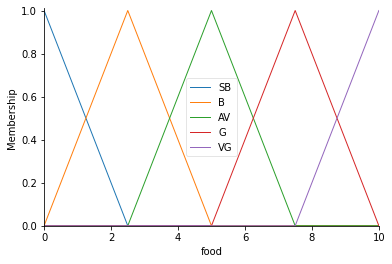

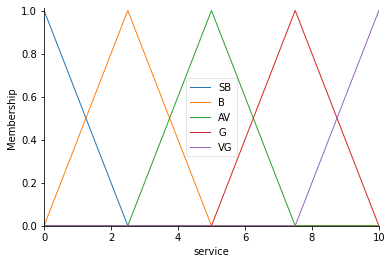

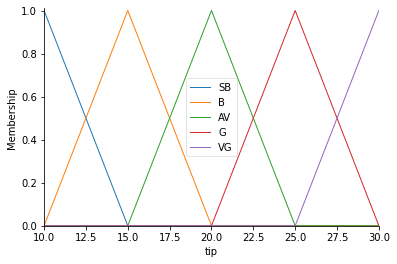

In [ ]:
evaluate = ['SB','B','AV','G','VG']
food.automf(names=evaluate)
service.automf(names=evaluate)
tip.automf(names=evaluate)

food.view()
service.view()
tip.view()

In [ ]:
rule_0=ctrl.Rule(antecedent=(food['SB']&service['SB'])|(food['SB']&service['B'])|(food['B']&service['SB']),consequent=tip['SB'],label="SO BAD")
rule_1=ctrl.Rule(antecedent=(food['B']&service['B'])|(food['B']&service['AV'])|(food['B']&service['G'])|(food['AV']&service['SB'])|(food['AV']&service['B'])|(food['G']&service['SB']),consequent=tip["B"],label="BAD")
rule_2=ctrl.Rule(antecedent=(food['AV']&service['AV'])|(food['AV']&service['G'])|(food['G']&service['B'])|(food['G']&service['AV'])|(food['VG']&service['SB'])|(food['VG']&service['B']),consequent=tip['AV'],label="AVERAGE")
rule_3=ctrl.Rule(antecedent=(food['VG']&service['AV'])|(food['G']&service['G'])|(food['AV']&service['VG']),consequent=tip['G'],label="GOOD")
rule_4=ctrl.Rule(antecedent=(food['G']&service['VG'])|(food['VG']&service['G'])|(food['VG']&service['VG']),consequent=tip['VG'],label="VERY GOOD")

In [ ]:
sys=ctrl.ControlSystem([rule_0,rule_1,rule_2,rule_3,rule_4])
sim=ctrl.ControlSystemSimulation(sys,flush_after_run=61*61+1)
upsample=np.linspace(0,10,61)
x,y,=np.meshgrid(upsample, upsample)
z=np.zeros_like(x)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axis3d 

In [ ]:
for i in range (61):
  for j in range(61):
    sim.input['food']=x[i,j]
    sim.input['service']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['tip']


ValueError: ignored

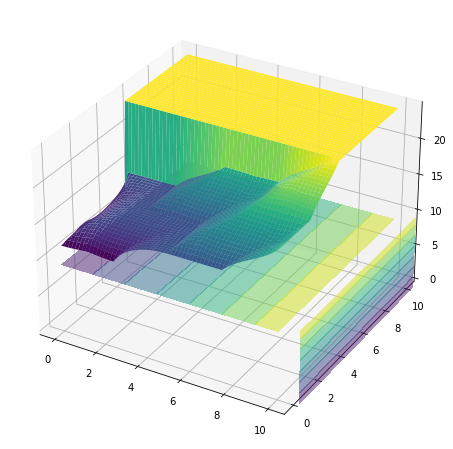

In [ ]:
# from networkx.algorithms.bipartite import projection
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d')
suf=ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis', linewidth=0.4,antialiased=True)
cset=ax.contourf(x,y,x,zdir='z', offset=9,cmap='viridis', alpha=0.5)
cset=ax.contourf(x,y,x,zdir='y', offset=11,cmap='viridis', alpha=0.5)
cset=ax.contourf(x,y,x,zdir='x', offset=11,cmap='viridis', alpha=0.5)